# Polarization

 - Explores different concepts from [lindell1992methods](https://books.google.ch/books?id=hdPvAAAAMAAJ) regarding polarization
 

In [1]:
%matplotlib inline
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


# Defaults See http://matplotlib.org/users/customizing.html
mpl.rcParams['axes.titlesize'] = 'x-large'
mpl.rcParams['axes.labelsize'] = 13#'x-large' # fontsize of the x any y labels
mpl.rcParams['axes.grid'] = True # display grid or not
mpl.rcParams['font.size'] = 11

### Complex Vectors

In [2]:

def to_timedomain(f, wt):
    """ f -> F(t) """
    return [np.real(fi * np.exp(1j*wt)) for fi in f]

def test_LP(f, epsilon=1E-12):
    """ Returns true if f is linearly polarized (LP)"""
    xp = np.cross(f, f.conj())
    return np.abs(np.dot(xp, xp)) < epsilon

def test_CP(f, epsilon=1E-12):
    """ Returns true if f is circularly polarized (CP)"""
    return np.abs(np.dot(f, f)) <epsilon

def squared_amplitude(f):
    """ Returns squared amplitudes of polarization vector f
        (what we measure with power probes)
        
        This value is proportional to the power of the wave
        so it can be used as a relative quantity to compare
        the relative power between two waves
    """
    return np.dot(f, f.conj()).real

def draw_polarization(f, **kargs):
    """ 
    Draws XY polarization ellipse on XY plane    
    """
    wt = np.linspace(0, 2*np.pi)
    Ft = to_timedomain(f, wt)
    
    if 'color' not in kargs:
        kargs['color'] = 'b'
    
    u, v = 0, 1
    
    h = plt.plot(Ft[u], Ft[v], **kargs)
    
    kargs.update(dict(scale=1, units='xy', linewidth=0, width=0.02, headwidth=2.5, alpha=0.8))
    Ft0, Ft1 = [ to_timedomain(f, wti) for wti in (0, np.pi/2) ]
    plt.quiver(0, 0, Ft0[u], Ft0[v], **kargs)    
    
    kargs.update(dict(alpha=0.4))
    plt.quiver(0, 0, Ft1[u], Ft1[v], **kargs)
    plt.axis("equal")

    
def print_info(**kargs):    
    for name, f in kargs.items():
        print(f"{name:3s}: {f}")
        print(f"LP : {test_LP(f)} ")
        print(f"CP : {test_CP(f)} ")
        print(f"SA : {squared_amplitude(f):3.2f}")
        print("")

a  : [1.+0.5j 0.+0.5j 0.+0.j ]
LP : False 
CP : False 
SA : 1.50



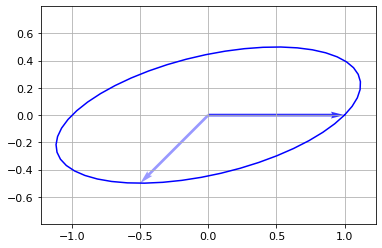

In [3]:
nx, ny = np.array([1,0,0]), np.array([0,1,0])
nz = np.cross(nx, ny)    

a = (1.0+0.5j)*nx + 0.5j*ny

#------
print_info(a=a)
draw_polarization(a, color="b")

### Axials decomposition 
 - Vectors $\mathbf{a}$ and $\mathbf{b} = \mathbf{a} e^{\mathrm{j}\theta}$ are the same ellipse ($\theta \in \mathbb{R}$).
 - $\exists \theta$ s.t. $\mathbf{b}_\mathrm{re}\cdot\mathbf{b}_\mathrm{im} = 0$
 - If $\mathbf{b}_\mathrm{re}\cdot\mathbf{b}_\mathrm{im} = 0$ then $\mathbf{b}_\mathrm{re}$ lie on major axes and $\mathbf{b}_\mathrm{im}$ on the minor axes.
 

In [4]:
def eval_axial_decomposition(f, epsilon=1E-12):
    """ f -> b and bre, bim are major, minor axis of the ellipse """
    m = np.sqrt(np.dot(f,f))
    if m<epsilon: # if circular, only thing we could do is align fre, fim along x and ys
        return f    
    c = np.abs(m)/m * f
    return c

a  : [1.+0.5j 0.+0.5j 0.+0.j ]
LP : False 
CP : False 
SA : 1.50

b1 : [ 0.35355339+1.06066017j -0.35355339+0.35355339j  0.        +0.j        ]
LP : False 
CP : False 
SA : 1.50

b2 : [1.11351636-0.10040571j 0.26286556+0.4253254j  0.        +0.j        ]
LP : False 
CP : False 
SA : 1.50



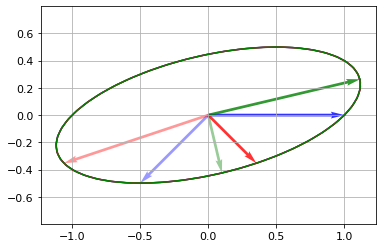

In [5]:
# Just same phase different among all components
theta = +np.pi/4
b1 = a * np.exp(1j*theta)

# And a proper decomposition
b2 = eval_axial_decomposition(a)


#--------
print_info(a=a, b1=b1, b2=b2)

draw_polarization(a, color="b")
draw_polarization(b1, color="r")
draw_polarization(b2, color="g")

### Parallel/Perpendicular (Co/Cross-polar) decomposition   

In [6]:
def eval_orthogonal_decomposition1(f, r, epsilon=1E-12):
    """ Decomposes f into a components co/cross-polar to the reference polarization r 
    """
    rdr =np.dot(r,r) 
    assert np.abs(rdr)>epsilon, "Cannot use this decomposition in CP"    
    
    # fcp is parallel to r
    fcp = np.dot(f,r)/rdr*r
    
    # fxp is 'perpendicular' to r
    fxp = -(np.cross(r, np.cross(r, f)))/rdr
    
    return fcp, fxp
    
    
def eval_orthogonal_decomposition2(f, r, epsilon=1E-12):
    """ Decomposes f into a components co/cross-polar to the reference polarization r but 
        using a definition that preserves power orthogonality.
    """
    rp2 = np.dot(r,r.conj()) # squared power of r
    assert rp2>epsilon, "Reference has NO power!, got {}".format(rp2)
    
    fcp = np.dot(f,r)/rp2*r.conj()
    fxp = -(np.cross(r, np.cross(r.conj(), f)))/rp2
    
    return fcp, fxp
        

 - Some random vector $\mathbf{c}$

a  : [1.+0.5j 0.+0.5j 0.+0.j ]
LP : False 
CP : False 
SA : 1.50

c  : [0.38956915+0.86219923j 0.94763726+0.50161149j 0.        +0.j        ]
LP : False 
CP : False 
SA : 2.04



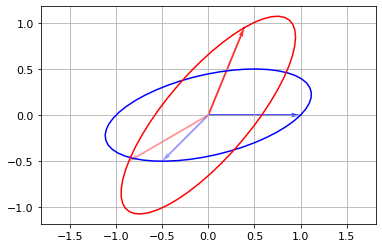

In [7]:
from numpy.random import rand

c = rand(3) + 1J*rand(3)
c[2] = 0.0 # so it is in plane XY

#-------
print_info(a=a, c=c)
plt.figure()
draw_polarization(a, color="b")
draw_polarization(c, color="r")

 - Orthogonal decomposition of $\mathbf{c}$ with respect to $\mathbf{a}$ 

c  : [0.38956915+0.86219923j 0.94763726+0.50161149j 0.        +0.j        ]
LP : False 
CP : False 
SA : 2.04

ccp1: [ 0.68461249+1.40004367j -0.42309497+0.55385373j  0.        +0.j        ]
LP : False 
CP : False 
SA : 2.91

cxp1: [-0.29504334-0.53784444j  1.37073223-0.05224224j -0.        +0.j        ]
LP : False 
CP : False 
SA : 2.26



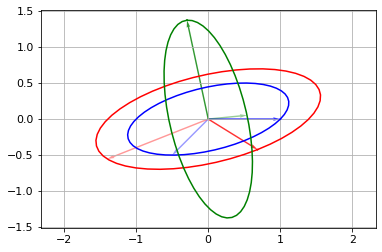

In [8]:
ccp1, cxp1 = eval_orthogonal_decomposition1(c, a)

#--------
print_info(c=c, ccp1=ccp1, cxp1=cxp1)

draw_polarization(a, color="b")
draw_polarization(ccp1, color="r")
draw_polarization(cxp1, color="g")

 - Orthogonal decomposition of $\mathbf{c}$ with respect to $\mathbf{a}$ using the definition that respects power orthogonality $|\mathbf{c}|^2 = |\mathbf{c}_\mathrm{co}|^2 + |\mathbf{c}_\mathrm{cr}|^2$

c  : [0.38956915+0.86219923j 0.94763726+0.50161149j 0.        +0.j        ]
LP : False 
CP : False 
SA : 2.04

ccp2: [0.31537667+1.11798036j 0.51026748+0.0974454j  0.        +0.j        ]
LP : False 
CP : False 
SA : 1.62

cxp2: [ 0.07419248-0.25578113j  0.43736978+0.40416609j -0.        +0.j        ]
LP : False 
CP : False 
SA : 0.43



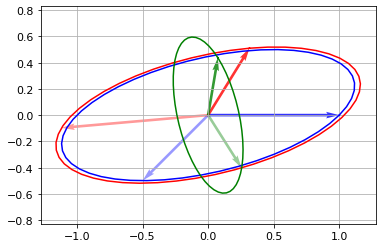

In [9]:
ccp2, cxp2 = eval_orthogonal_decomposition2(c, a)

#--------
print_info(c=c, ccp2=ccp2, cxp2=cxp2)

draw_polarization(a, color="b")
draw_polarization(ccp2, color="r")
draw_polarization(cxp2, color="g")

 - Comparison between both definitions

ccp1: [ 0.68461249+1.40004367j -0.42309497+0.55385373j  0.        +0.j        ]
LP : False 
CP : False 
SA : 2.91

cxp1: [-0.29504334-0.53784444j  1.37073223-0.05224224j -0.        +0.j        ]
LP : False 
CP : False 
SA : 2.26

ccp2: [0.31537667+1.11798036j 0.51026748+0.0974454j  0.        +0.j        ]
LP : False 
CP : False 
SA : 1.62

cxp2: [ 0.07419248-0.25578113j  0.43736978+0.40416609j -0.        +0.j        ]
LP : False 
CP : False 
SA : 0.43



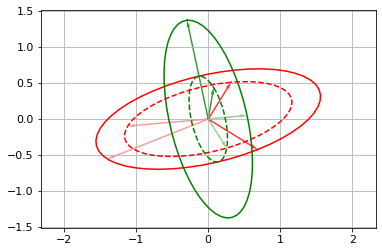

In [10]:
print_info(ccp1=ccp1, cxp1=cxp1, ccp2=ccp2, cxp2=cxp2)

draw_polarization(ccp1, color="r", linestyle='-')
draw_polarization(cxp1, color="g", linestyle='-')
draw_polarization(ccp2, color="r", linestyle='--')
draw_polarization(cxp2, color="g", linestyle='--')